# Árvores de decisão e florestas aleatórias em Python

Este é o código que aborda sobre os métodos de árvores de decisões em Python. 

## Visão geral do problema
A cifose é um distúrbio da coluna em que uma curva excessiva da coluna para fora resulta em um arredondamento anormal da parte superior das costas. A condição é às vezes conhecida como "arredondamento" ou - no caso de uma curva acentuada - como "corcunda". A cifose pode ocorrer em qualquer idade, mas é comum durante a adolescência. Muitos pacientes são operados de cifose e mesmo após a operação o distúrbio pode estar presente.

Portanto, o problema em questão é prever, olhando para os vários fatores do paciente, se o paciente ainda tem distúrbio de cifose após a operação ou não.

Por ser um problema de classificação, uma boa maneira de abordar esse problema é por meio de algoritmos de Árvores de Decisão e Floresta Aleatória.

## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Obtendo os dados

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [4]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## Detalhes do conjunto de dados
O conjunto de dados contém as seguintes colunas:

Kyphosis: Esta coluna representa que o paciente teve cifose e foi submetido a uma cirurgia corrigida da coluna vertebral. Portanto, esta coluna basicamente diz se a condição de cifose estava presente ou ausente após a operação

Age: Idade do paciente em meses (o conjunto de dados é um conjunto de dados de crianças)

Number: Número de vértebras envolvidas na operação

Start: número da primeira vértebra ou vértebra superior que foi operada

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [6]:
df.shape

(81, 4)

In [7]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


## EDA (Exploratory Data Analysis)

Vamos observar um simples pairplot para este pequeno conjunto de dados.

/home/acll/workspace/data-analysis/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/acll/workspace/data-analysis/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/acll/workspace/data-analysis/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/acll/workspace/data-analysis/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

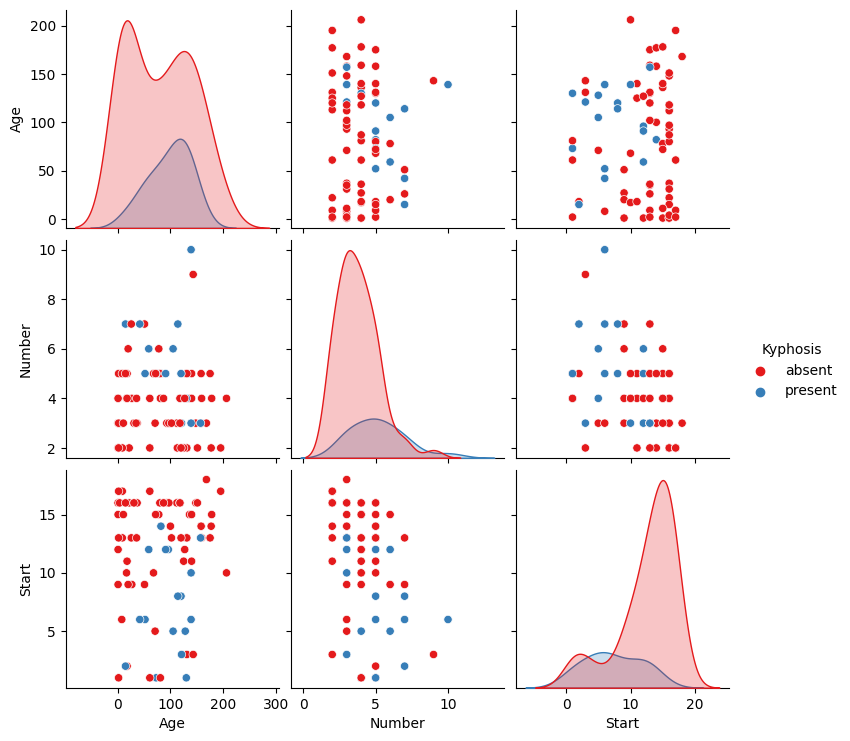

In [11]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

/home/acll/workspace/data-analysis/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/acll/workspace/data-analysis/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

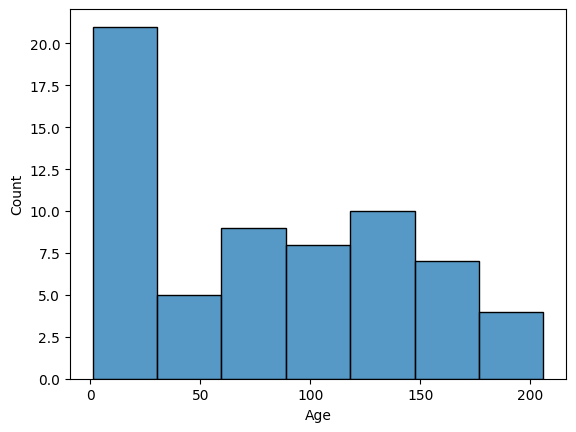

In [17]:
sns.histplot(df[df['Kyphosis'] == 'absent'].Age)

/home/acll/workspace/data-analysis/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/acll/workspace/data-analysis/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

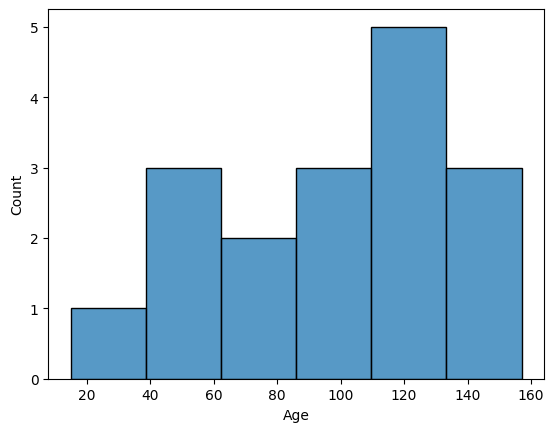

In [18]:
sns.histplot(df[df['Kyphosis'] == 'present'].Age)

## Divisão treino-teste

Vamos dividir os dados em um conjunto de treinamento e um conjunto de testes!

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Árvores de decisão

Começaremos apenas treinando uma única árvore de decisão.

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=3) 
# Instantiating Decision Tree model (basically creating a decision tree object)

In [90]:
dtree.fit(X_train,y_train)
# Training or fitting the model on training data

DecisionTreeClassifier(criterion='entropy', max_depth=3)

## Previsão e Avaliação

Vamos avaliar a nossa árvore de decisão.

In [91]:
predictions = dtree.predict(X_test)

In [68]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [92]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, predictions))

Accuracy: 0.76


In [93]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.89      0.81      0.85        21
     present       0.33      0.50      0.40         4

    accuracy                           0.76        25
   macro avg       0.61      0.65      0.62        25
weighted avg       0.80      0.76      0.78        25



In [94]:
print(confusion_matrix(y_test,predictions))

[[17  4]
 [ 2  2]]


## Visualização de árvore

O Scikit learn possui alguns recursos de visualização incorporados para árvores de decisão. Você não usará isso com freqüência e requer que você instale a biblioteca pydot, mas aqui está um exemplo do código para executar isso:

In [97]:
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

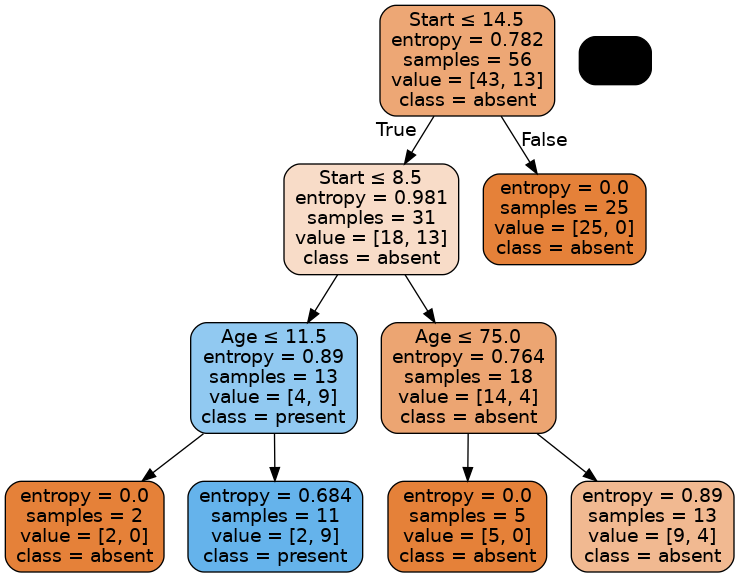

In [98]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True, special_characters=True, class_names=['absent','present'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

## Florestas aleatórias

Agora vamos comparar o modelo da árvore de decisão com uma floresta aleatória.

In [99]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [100]:
rfc_pred = rfc.predict(X_test)

In [101]:
print(confusion_matrix(y_test,rfc_pred))

[[17  4]
 [ 3  1]]


In [102]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.85      0.81      0.83        21
     present       0.20      0.25      0.22         4

    accuracy                           0.72        25
   macro avg       0.53      0.53      0.53        25
weighted avg       0.75      0.72      0.73        25



In [106]:
import graphviz

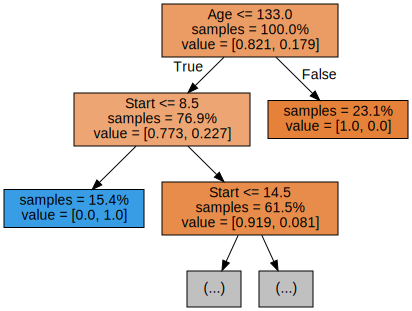

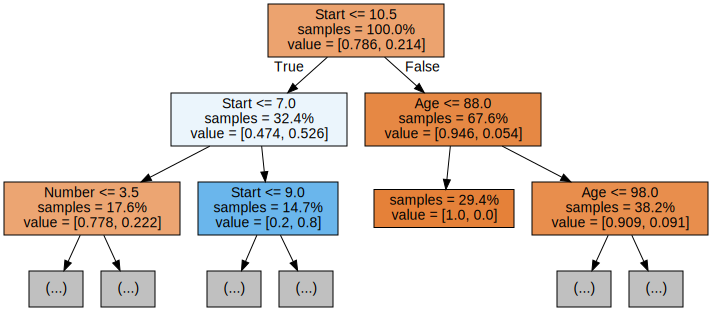

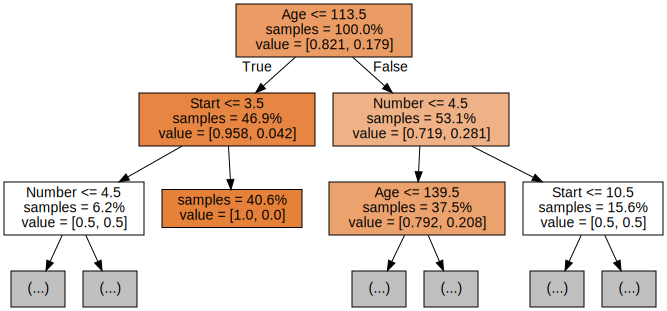

In [107]:
for i in range(3):
    tree = rfc.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [124]:
from sklearn.model_selection import RandomizedSearchCV
from random import randint

distributions = {
    'n_estimators': [randint(50, 500)], 
    'max_depth': [randint(1, 20)]
}

rfc = RandomForestClassifier()

clf = RandomizedSearchCV(rfc, param_distributions=distributions, n_iter=5, cv=5)
clf.fit(X_train, y_train)
# search.best_params_

/home/acll/workspace/data-analysis/.venv/lib/python3.9/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [2],
                                        'n_estimators': [356]})

In [126]:
# Create a variable for the best model
best_rf = clf.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  clf.best_params_)

Best hyperparameters: {'n_estimators': 356, 'max_depth': 2}


In [127]:
from sklearn.metrics import ConfusionMatrixDisplay

In [129]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

print(confusion_matrix(y_test,y_pred))

# Create the confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# ConfusionMatrixDisplay(confusion_matrix=cm).plot();

[[20  1]
 [ 2  2]]


In [130]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      absent       0.91      0.95      0.93        21
     present       0.67      0.50      0.57         4

    accuracy                           0.88        25
   macro avg       0.79      0.73      0.75        25
weighted avg       0.87      0.88      0.87        25



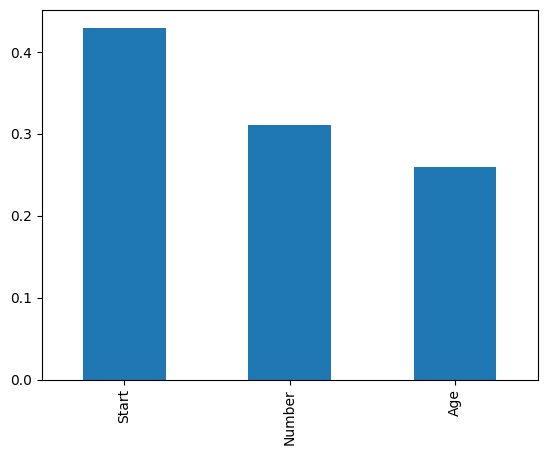

In [131]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();